In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Part 1 Feedforward
#### 1
![Alt text](http://mtzhang.georgetown.domains/nn.jpg)

#### 2

$$y = \sigma(h_1v_1+h_2v_2+h_3v_3+c)$$
$$h_1 = max(0,w_{11}x_1+w_{21}x_2+b_1)$$
$$h_2 = max(0,w_{12}x_1+w_{22}x_2+b_2)$$
$$h_3 = max(0,w_{13}x_1+w_{23}x_2+b_3)$$
where $\sigma$ denotes the *sigmoid* function.

#### 3

In [96]:
# helper functions
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]


In [97]:
def ff_nn_ReLu(x, params):
    W,v,b,c = params
    h = relu(np.dot(x, W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

#### 4

In [99]:
W = np.array([[1, -1, 0],[0,0,.5]]).reshape(2,3)
b = np.array([0,0,1]).reshape(1,3)
v = np.array([1,0,-1]).reshape(3,1)
c = np.array([1])
x = np.array([[1,-1],[0,-1],[0,1]]).reshape((3,2))
ff_nn_ReLu(x, (W,v,b,c))

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

## Part 2 Gradient Descent

#### 1
$$f(x,y)=(1-x^3)+100*(y^2-x)^2$$
$$f_x = -3x^2-200(y^2-x)$$
$$f_y = 400y(y^2-x)$$

#### 2

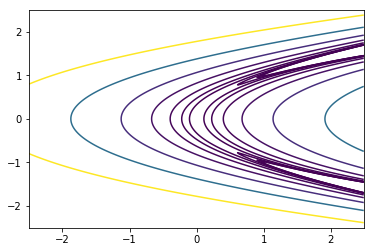

In [18]:
delta = 0.01
s = 2.5
x = np.arange(-s, s, delta)
y = np.arange(-s, s, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X**3) + 100*(Y**2 - X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.logspace(start=-1,stop=3, num=10))

#### 3

In [23]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2-200*(y**2-x)
    df_dy = 400*y*(y**2-x)
    return np.array([df_dx, df_dy])

In [24]:
def grad_descent(starting_point=None, iterations, learning_rate):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-3,3,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - (learning_rate * grad)
        trajectory.append(point)
    return np.array(trajectory)

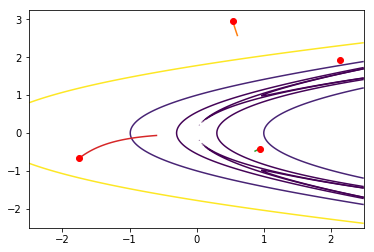

In [39]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.logspace(start=-1,stop=3, num=5))

trajectories = []
for i in range(-7,-3):
    traj = grad_descent(iterations=50, learning_rate=10**(i))
    trajectories.append(grad_descent(iterations=50, learning_rate=10**(i)))
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-')
    plt.plot(x[0],y[0],'ro')

#### 4

In [46]:
def grad_descent_momentum(starting_point=None, iterations=10, learning_rate=0.001,alpha=0.01):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-3,3,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - (learning_rate * grad) - (alpha*grad)
        trajectory.append(point)
    return np.array(trajectory)

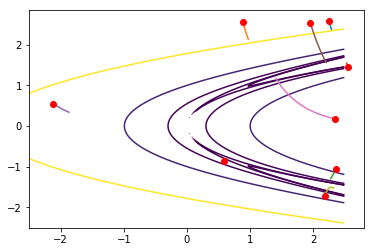

In [51]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.logspace(start=-1,stop=3, num=5))

trajectories = []
for i in range(-6,-3):
    for j in range(-7,-4):
        traj = grad_descent_momentum(iterations=50, learning_rate=10**(i),alpha = 10**(j))
        trajectories.append(grad_descent_momentum(iterations=50, learning_rate=10**(i),alpha = 10**(j)))
        x= traj[:,0]
        y= traj[:,1]
        plt.plot(x,y,'-')
        plt.plot(x[0],y[0],'ro')

## Part 3 Back Prop

#### 1
$$L = \Sigma_{k=1}^n L_k =\Sigma_{k=1}^n -y_k\log(\hat{y_k}) - (1-y_k)\log(1-\hat{y_k}) $$

$$
\frac{\partial L_k}{\partial v_i} = (\hat{y_k}-y_k)h_i
$$

$$
\frac{\partial L_k}{\partial w_{ji}} = (\hat{y_k}-y_k)v_iI(h_i>0)x_j
$$

$$
\frac{\partial L_k}{\partial b_{i}} = (\hat{y_k}-y_k)v_iI(h_i>0)
$$

$$
\frac{\partial L_k}{\partial c} = \hat{y_k}-y_k
$$

for $i\in [1,2,3]$ and $j \in [1,2]$

#### 2

In [269]:
def grad_f(params,x,y):
    W,v,b,c = params
    h = relu(np.dot(x, W) + b)
    y_hat = sigmoid(np.dot(h,v) + c)
    y = y.reshape(1000,1)
    d_c = (y_hat-y).sum()
    d_v = h.T.dot(y_hat-y)
    d_b = ((y_hat-y).dot(v.T)*relu_derivative(h)).sum(axis=0)
    d_W = x.T.dot((y_hat-y).dot(v.T)*relu_derivative(h))
    return (d_W,d_v,d_b,d_c)

#### 3

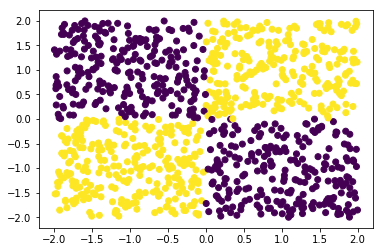

In [270]:
# Create data sets
X = np.random.uniform(-2,2,size=(1000,2))
Y = np.zeros(1000)
Y[np.logical_and(X[:,0]>0, X[:,1]>0)] = 1
Y[np.logical_and(X[:,0]<0, X[:,1]<0)] = 1
plt.scatter(X[:,0],X[:,1],c=Y)

#### 4

In [330]:
def grad_descent(x, y, starting_point, iterations=10, learning_rate=1e-2):
    point = starting_point 
    trajectory = [point]
    losses = [loss(y, ff_nn_ReLu(x, point))]
    for i in range(iterations):
        grads = grad_f(point, x, y)
        update = []
        for (matrix, grad) in zip(point, grads):
            update.append(matrix - learning_rate*grad)
        point = tuple(update)
        trajectory.append(point)
        losses.append(loss(y, ff_nn_ReLu(x, point)))
    return (np.array(trajectory), losses)

def initialize_params():
    W = np.random.randn(6).reshape(2,3)
    v = np.random.randn(3).reshape(3,1)
    b = np.random.randn(3).reshape(1,3)
    c = np.random.randn(1).reshape(1,1)
    return (W,v,b,c)

In [331]:
p_0 = initialize_params()
traj, losses = grad_descent(X, Y, starting_point=p_0, iterations=50,learning_rate=1e-4)

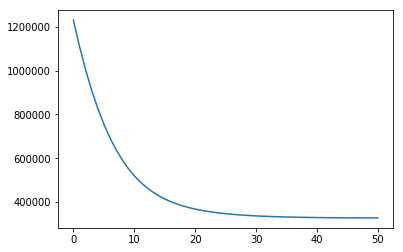

In [332]:
plt.plot(losses)

#### 5

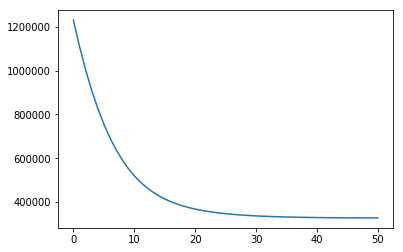

In [334]:
def grad_descent_momentum(x, y, starting_point, iterations=10, learning_rate=1e-2,alpha=0.00001):
    point = starting_point 
    trajectory = [point]
    losses = [loss(y, ff_nn_ReLu(x, point))]
    prev=None
    for i in range(iterations):
        grads = grad_f(point, x, y)
        update = []
        if not prev:
            for (matrix, grad) in zip(point, grads):
                update.append(matrix - learning_rate*grad)
        else:
            for (matrix, grad) in zip(point, grads):
                update.append(matrix - learning_rate*grad - alpha*prev)
        prev = grads
        point = tuple(update)
        trajectory.append(point)
        losses.append(loss(y, ff_nn_ReLu(x, point)))
    return (np.array(trajectory), losses)

traj, losses = grad_descent(X, Y, starting_point=p_0, iterations=50,learning_rate=1e-4)
plt.plot(losses)

There is not obvious improvement for momentum in this problem.

#### 6

In [335]:
y_pred=ff_nn_ReLu(X, traj[-1])
y_pred[y_pred >=0.5] = 1
y_pred[y_pred < 0.5] = 0

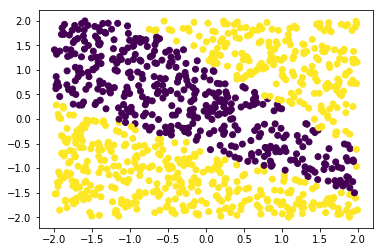

In [337]:
plt.scatter(X[:,0],X[:,1],c=y_pred.reshape(1000))

In [338]:
def plot_decision_boundary(y_pred, X, y,params):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    _in=np.array([xx.ravel(), yy.ravel()]).T
    Z=ff_nn_ReLu(_in,params)
    Z=Z>0.5
    Z=Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=np.squeeze(y))


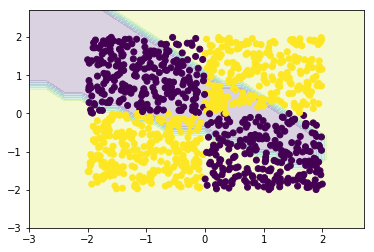

In [339]:
plot_decision_boundary(y_pred, X, Y,traj[-1])